# How to Calculate Feature Importance With Python
by Jason Brownlee on  June 30, 2020. [Here](https://machinelearningmastery.com/calculate-feature-importance-with-python/) in [Data Preparation](https://machinelearningmastery.com/category/data-preparation/)

Feature importance refers to **techniques that assign a score to input features based on how useful they are at predicting a target variable**.

There are many types and sources of feature importance scores, although popular examples include `statistical correlation` scores, `coefficients` calculated as part `of linear models`, `decision trees`, and `permutation importance` scores.

After completing this tutorial, you will know:

- The role of feature importance in a predictive modeling problem.
- How to calculate and review feature importance from linear models and decision trees.
- How to calculate and review permutation feature importance scores.

## Tutorial Overview
This tutorial is divided into six parts; they are:

1. Feature Importance
2. Preparation
    1. Check Scikit-Learn Version
    2. Test Datasets
3. Coefficients as Feature Importance
    1. Linear Regression Feature Importance
    2. Logistic Regression Feature Importance
4. Decision Tree Feature Importance
    1. CART Feature Importance
        1. CART Regression Feature Importance
        2. CART Classification Feature Importance
    2. Random Forest Feature Importance
        1. Random Forest Regression Feature Importance
        2. Random Forest Classification Feature Importance
    3. XGBoost Feature Importance
        1. XGBoost Regression Feature Importance
        2. XGBoost Classification Feature Importance
5. Permutation Feature Importance
    1. Permutation Feature Importance for Regression
    2. Permutation Feature Importance for Classification
6. Feature Selection with Importance

## 1. Feature Importance
Feature importance refers to a class of techniques for assigning scores -`Feature Importance Scores`- to input features to a predictive model that indicates the relative importance of each feature when making a prediction.

The scores are useful and can be used in a range of situations in a predictive modeling problem, such as:

- **Better understanding the data**. The relative scores can highlight which features may be most relevant to the target, and the converse, which features are the least relevant
- **Better understanding a model**. Most importance scores are calculated by a predictive model that has been fit on the dataset. Inspecting the importance score provides insight into that specific model and which features are the most important and least important to the model when making a prediction.
- **Reducing the number of input features**. This can be achieved by using the importance scores to select those features to delete (lowest scores) or those features to keep (highest scores). This is a type of feature selection and can simplify the problem that is being modeled, speed up the modeling process (`deleting features is called dimensionality reduction`), and in some cases, improve the performance of the model

We will look at three main types of more advanced feature importance; they are:

- Feature importance from `model coefficients` (3).
- Feature importance from `decision trees` (4).
- Feature importance from `permutation testing` (5).

## 2. Preparation
### 1. check scikit-learn version

In [1]:

import sklearn
print(sklearn.__version__)

0.22.2.post1


### 2. Test Datasets
Define some test datasets that we can use as the basis for demonstrating and exploring feature importance scores.

Each test problem has five important and five unimportant features, and it may be interesting to see which methods are consistent at finding or differentiating the features based on their importance.

#### Classification Dataset
The dataset will have 1,000 examples, with 10 input features, five of which will be informative and the remaining five will be redundant. 

We will fix the random number seed to ensure we get the same examples each time the code is run.

In [2]:
# test classification dataset
from sklearn.datasets import make_classification

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


#### Regression Dataset
Like the classification dataset, the regression dataset will have 1,000 examples, with 10 input features, five of which will be informative and the remaining five that will be redundant.

In [3]:
# test regression dataset
from sklearn.datasets import make_regression

# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


## 3. Coefficients as Feature Importance
Linear machine learning algorithms fit a model where the prediction is the weighted sum of the input values.

Examples include `linear regression`, `logistic regression`, and extensions that add **regularization**, such as [ridge regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) and the [elastic net](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html).

All of these algorithms find a set of coefficients to use in the weighted sum in order to make a prediction. These coefficients can be used directly as a crude type of feature importance score.

### 1. Linear Regression Feature Importance
We can fit a `LinearRegression model` on the regression dataset and retrieve the coeff_ property that contains the coefficients found for each input variable.

These coefficients can provide the basis for a crude feature importance score. This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

Feature: 0, Score: -0.00000
Feature: 1, Score: 12.44483
Feature: 2, Score: 0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 93.32225
Feature: 5, Score: 86.50811
Feature: 6, Score: 26.74607
Feature: 7, Score: 3.28535
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000


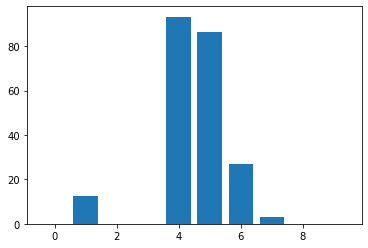

In [4]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# define the model
model = LinearRegression()

# fit the model
model.fit(X, y)

# get importance
importance = model.coef_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

The scores suggest that the model found the five important features and marked all other features with a zero coefficient, essentially removing them from the model.

### 2. Logistic Regression Feature Importance

We can fit a LogisticRegression model on the regression dataset and retrieve the coeff_ property that contains the coefficients found for each input variable.

These coefficients can provide the basis for a crude feature importance score. `This assumes that the input variables have the same scale` or `have been scaled prior to fitting a model`.

Feature: 0, Score: 0.16320
Feature: 1, Score: -0.64301
Feature: 2, Score: 0.48497
Feature: 3, Score: -0.46190
Feature: 4, Score: 0.18432
Feature: 5, Score: -0.11978
Feature: 6, Score: -0.40602
Feature: 7, Score: 0.03772
Feature: 8, Score: -0.51785
Feature: 9, Score: 0.26540


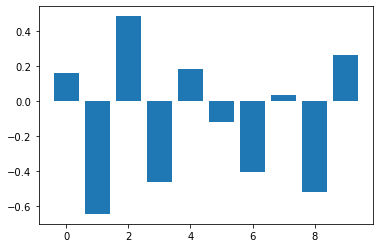

In [5]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# define the model
model = LogisticRegression()

# fit the model
model.fit(X, y)

# get importance
importance = model.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Recall this is a classification problem with classes 0 and 1. Notice that the coefficients are both positive and negative. The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0.

**No clear pattern of important and unimportant features can be identified from these results**.

## 4. Decision Tree Feature Importance
Decision tree algorithms like classification and regression trees (CART) offer importance scores based on the reduction in the criterion `used to select split points`, like **Gini** or **entropy**.

This same approach can be used for `ensembles of decision trees`, such as the `random forest` and `stochastic gradient boosting` algorithms.

### 1. CART Feature Importance
We can use the CART algorithm for feature importance implemented in scikit-learn as the `DecisionTreeRegressor` and `DecisionTreeClassifier` classes.

After being fit, the model provides a **feature_importances_** property that can be accessed to retrieve the relative importance scores for each input feature.

#### 1. CART Regression Feature Importance

Feature: 0, Score: 0.00260
Feature: 1, Score: 0.00440
Feature: 2, Score: 0.00203
Feature: 3, Score: 0.00241
Feature: 4, Score: 0.51767
Feature: 5, Score: 0.43750
Feature: 6, Score: 0.02720
Feature: 7, Score: 0.00257
Feature: 8, Score: 0.00252
Feature: 9, Score: 0.00110


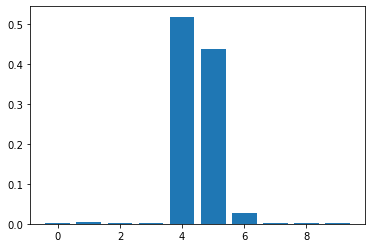

In [6]:
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# define the model
model = DecisionTreeRegressor()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

The results suggest perhaps three of the 10 features as being important to prediction.

#### 2. CART Classification Feature Importance

Feature: 0, Score: 0.01109
Feature: 1, Score: 0.01029
Feature: 2, Score: 0.19130
Feature: 3, Score: 0.30300
Feature: 4, Score: 0.09611
Feature: 5, Score: 0.00610
Feature: 6, Score: 0.18395
Feature: 7, Score: 0.03167
Feature: 8, Score: 0.13207
Feature: 9, Score: 0.03443


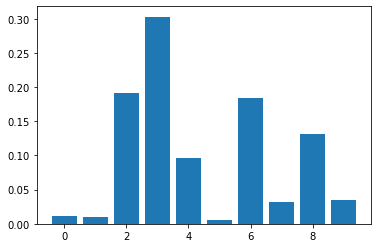

In [7]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# define the model
model = DecisionTreeClassifier()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

The results suggest perhaps four of the 10 features as being important to prediction.

### 2. Random Forest Feature Importance

We can use the Random Forest algorithm for feature importance implemented in scikit-learn as the `RandomForestRegressor` and `RandomForestClassifier` classes.

After being fit, the model provides a **feature_importances_ property** that can be accessed to retrieve the relative importance scores for each input feature.

This approach can also be used with the `bagging` and `extra trees` algorithms.

#### 1. Random Forest Regression Feature Importance

Feature: 0, Score: 0.00293
Feature: 1, Score: 0.00561
Feature: 2, Score: 0.00270
Feature: 3, Score: 0.00281
Feature: 4, Score: 0.53448
Feature: 5, Score: 0.41718
Feature: 6, Score: 0.02590
Feature: 7, Score: 0.00260
Feature: 8, Score: 0.00316
Feature: 9, Score: 0.00263


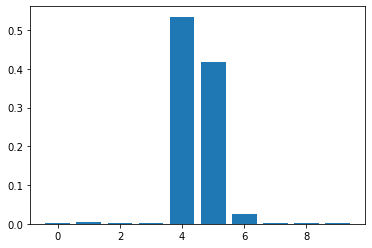

In [8]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# define the model
model = RandomForestRegressor()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

The results suggest perhaps two or three of the 10 features as being important to prediction.

#### 2. Random Forest Classification Feature Importance

Feature: 0, Score: 0.06750
Feature: 1, Score: 0.10490
Feature: 2, Score: 0.16413
Feature: 3, Score: 0.20558
Feature: 4, Score: 0.08739
Feature: 5, Score: 0.10245
Feature: 6, Score: 0.09081
Feature: 7, Score: 0.04627
Feature: 8, Score: 0.09031
Feature: 9, Score: 0.04067


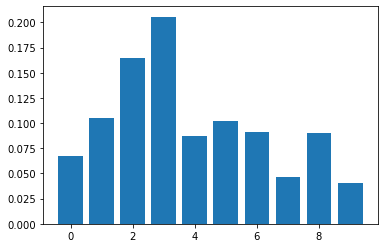

In [9]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# define the model
model = RandomForestClassifier()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

The results suggest perhaps two or three of the 10 features as being important to prediction.

### 3. XGBoost Feature Importance
XGBoost is a library that provides an `efficient and effective implementation of the stochastic gradient boosting` algorithm.

This algorithm can be used with scikit-learn via the `XGBRegressor` and `XGBClassifier` classes.

After being fit, the model provides a **feature_importances_** property that can be accessed to retrieve the relative importance scores for each input feature.

This algorithm is also provided via scikit-learn via the `GradientBoostingClassifier` and `GradientBoostingRegressor` classes and the same approach to feature selection can be used.

In [10]:
# _> conda install xgboost
# Then confirm that the library was installed correctly
import xgboost
print(xgboost.__version__)

1.0.2


#### 1. XGBoost Regression Feature Importance

Feature: 0, Score: 0.00039
Feature: 1, Score: 0.00583
Feature: 2, Score: 0.00112
Feature: 3, Score: 0.00129
Feature: 4, Score: 0.49502
Feature: 5, Score: 0.46443
Feature: 6, Score: 0.02951
Feature: 7, Score: 0.00086
Feature: 8, Score: 0.00075
Feature: 9, Score: 0.00079


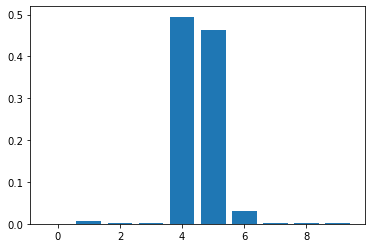

In [11]:
# xgboost for feature importance on a regression problem
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from matplotlib import pyplot

# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# define the model
model = XGBRegressor()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

The results suggest perhaps two or three of the 10 features as being important to prediction.

#### 2. XGBoost Classification Feature Importance

Feature: 0, Score: 0.03723
Feature: 1, Score: 0.07725
Feature: 2, Score: 0.12537
Feature: 3, Score: 0.29666
Feature: 4, Score: 0.10099
Feature: 5, Score: 0.05706
Feature: 6, Score: 0.13027
Feature: 7, Score: 0.03537
Feature: 8, Score: 0.11694
Feature: 9, Score: 0.02285


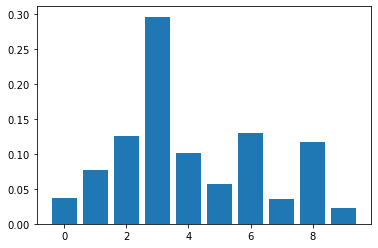

In [12]:
# xgboost for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# define the model
model = XGBClassifier()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

The results suggest perhaps seven of the 10 features as being important to prediction.

## 5. Permutation Feature Importance
Permutation feature importance is a `technique for calculating relative importance scores that is independent of the model` used.

First, a model is fit on the dataset, such as a model that does not support native feature importance scores. Then the model is used to make predictions on a dataset, although the values of a feature (column) in the dataset are scrambled. This is repeated for each feature in the dataset. Then this whole process is repeated 3, 5, 10 or more times. The result is a mean importance score for each input feature (and distribution of scores given the repeats).

This approach can be used for regression or classification and requires that a performance metric be chosen as the basis of the importance score, such as the `mean squared error for regression` and `accuracy for classification`.

Permutation feature selection can be used via the **permutation_importance()** function that takes a fit model, a dataset (train or test dataset is fine), and a scoring function.

### 1. Permutation Feature Importance for Regression

Feature: 0, Score: 116.72667
Feature: 1, Score: 350.60519
Feature: 2, Score: 181.00728
Feature: 3, Score: 105.50267
Feature: 4, Score: 9604.65655
Feature: 5, Score: 8191.82087
Feature: 6, Score: 931.98344
Feature: 7, Score: 168.23083
Feature: 8, Score: 127.66276
Feature: 9, Score: 64.48241


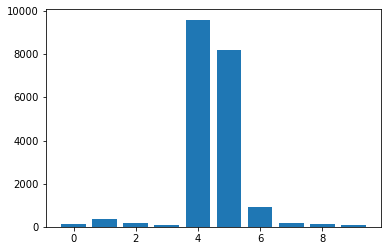

In [13]:
# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# define the model
model = KNeighborsRegressor()

# fit the model
model.fit(X, y)

# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')

# get importance
importance = results.importances_mean

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

The results suggest perhaps two or three of the 10 features as being important to prediction.

### 2. Permutation Feature Importance for Classification

Feature: 0, Score: 0.05700
Feature: 1, Score: 0.06440
Feature: 2, Score: 0.05720
Feature: 3, Score: 0.09320
Feature: 4, Score: 0.04920
Feature: 5, Score: 0.05740
Feature: 6, Score: 0.07440
Feature: 7, Score: 0.05840
Feature: 8, Score: 0.05580
Feature: 9, Score: 0.02960


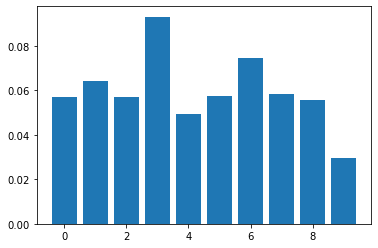

In [14]:
# permutation feature importance with knn for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# define the model
model = KNeighborsClassifier()

# fit the model
model.fit(X, y)

# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')

# get importance
importance = results.importances_mean

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

he results suggest perhaps two or three of the 10 features as being important to prediction.

## 6. Feature Selection with Importance

Feature importance scores can be used to help interpret the data, but they can also be used directly to help rank and select features that are most useful to a predictive model.

#### Demonstration
Recall, our synthetic dataset has 1,000 examples each with 10 input variables, five of which are redundant and five of which are important to the outcome. We can use feature importance scores to help select the five variables that are relevant and only use them as inputs to a predictive model.

First, we can split the training dataset into train and test sets and train a model on the training dataset, make predictions on the test set and evaluate the result using classification accuracy. We will use a logistic regression model as the predictive model.

Note. `This provides a baseline for comparison when we remove some features using feature importance scores`.

In [15]:
# evaluation of a model using all features
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# define the dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# evaluate the model
yhat = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 84.55


Given that we created the dataset, we would expect better or the same results with half the number of input variables.

We could use any of the feature importance scores explored above, but in this case we will use the feature importance scores provided by random forest.

In [16]:
# evaluation of a model using 5 features chosen with random forest importance
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectFromModel(RandomForestClassifier(n_estimators=1000), max_features=5)
    
    # learn relationship from training data
    fs.fit(X_train, y_train)
    
    # transform train input data
    X_train_fs = fs.transform(X_train)
    
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# define the dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)

# evaluate the model
yhat = model.predict(X_test_fs)

# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 84.55


In this case, we can see that the model achieves the same performance on the dataset, although with half the number of input features. As expected, the feature importance scores calculated by random forest allowed us to accurately rank the input features and delete those that were not relevant to the target variable.

## Further Reading
This section provides more resources on the topic if you are looking to go deeper.

### Related Tutorials
- [How to Choose a Feature Selection Method For Machine Learning](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)
- [How to Perform Feature Selection with Categorical Data](https://machinelearningmastery.com/feature-selection-with-categorical-data/)
- [Feature Importance and Feature Selection With XGBoost in Python](https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/)
- [Feature Selection For Machine Learning in Python](https://machinelearningmastery.com/feature-selection-machine-learning-python/)
- [An Introduction to Feature Selection](https://machinelearningmastery.com/an-introduction-to-feature-selection/)

## Summary
In this tutorial, you discovered feature importance scores for machine learning in python

Specifically, you learned:

- The role of feature importance in a predictive modeling problem.
- How to calculate and review feature importance from linear models and decision trees.
- How to calculate and review permutation feature importance scores.